In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')

In [2]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [3]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import r2_score

est = LinearRegression()
est.fit(X_train, y_train)
y_pred = est.predict(X_test)
print(f"R^2 score = {r2_score(y_test, y_pred):.3f}")

R^2 score = 0.635


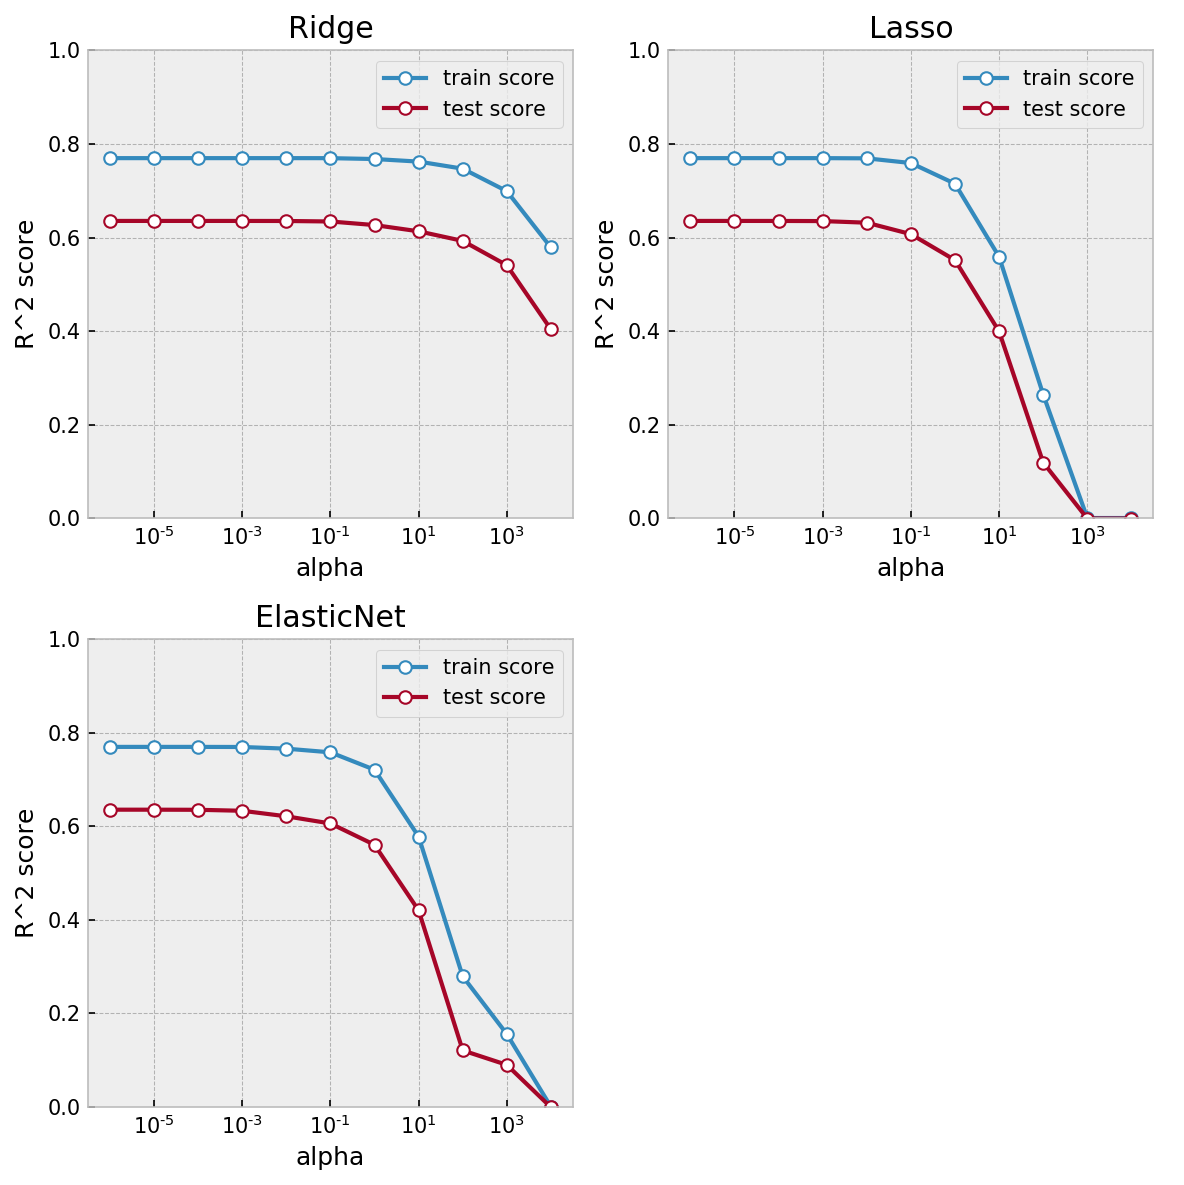

In [4]:
fig, axes = plt.subplots(2, 2, dpi=150, figsize=(8, 8))
ax = axes.ravel()

alphas = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4]
R2_train = []
R2_test = []
for alpha in alphas:
    est = Ridge(alpha=alpha)
    est.fit(X_train, y_train)
    y_pred = est.predict(X_train)
    R2_train.append(r2_score(y_train, y_pred))
    y_pred = est.predict(X_test)
    R2_test.append(r2_score(y_test, y_pred))

ax[0].plot(alphas, R2_train, marker='o', mfc='w', label='train score')
ax[0].plot(alphas, R2_test, marker='o', mfc='w', label='test score')
ax[0].set_ylim(0, 1)
ax[0].legend()
ax[0].set_xscale('log')
ax[0].set_xlabel('alpha')
ax[0].set_ylabel('R^2 score')
ax[0].set_title('Ridge')

R2_train = []
R2_test = []
for alpha in alphas:
    est = Lasso(alpha=alpha)
    est.fit(X_train, y_train)
    y_pred = est.predict(X_train)
    R2_train.append(r2_score(y_train, y_pred))
    y_pred = est.predict(X_test)
    R2_test.append(r2_score(y_test, y_pred))

ax[1].plot(alphas, R2_train, marker='o', mfc='w', label='train score')
ax[1].plot(alphas, R2_test, marker='o', mfc='w', label='test score')
ax[1].set_ylim(0, 1)
ax[1].legend()
ax[1].set_xscale('log')
ax[1].set_xlabel('alpha')
ax[1].set_ylabel('R^2 score')
ax[1].set_title('Lasso')

R2_train = []
R2_test = []
for alpha in alphas:
    est = ElasticNet(alpha=alpha)
    est.fit(X_train, y_train)
    y_pred = est.predict(X_train)
    R2_train.append(r2_score(y_train, y_pred))
    y_pred = est.predict(X_test)
    R2_test.append(r2_score(y_test, y_pred))

ax[2].plot(alphas, R2_train, marker='o', mfc='w', label='train score')
ax[2].plot(alphas, R2_test, marker='o', mfc='w', label='test score')
ax[2].set_ylim(0, 1)
ax[2].legend()
ax[2].set_xscale('log')
ax[2].set_xlabel('alpha')
ax[2].set_ylabel('R^2 score')
ax[2].set_title('ElasticNet')

ax[3].axis('off')
plt.tight_layout()

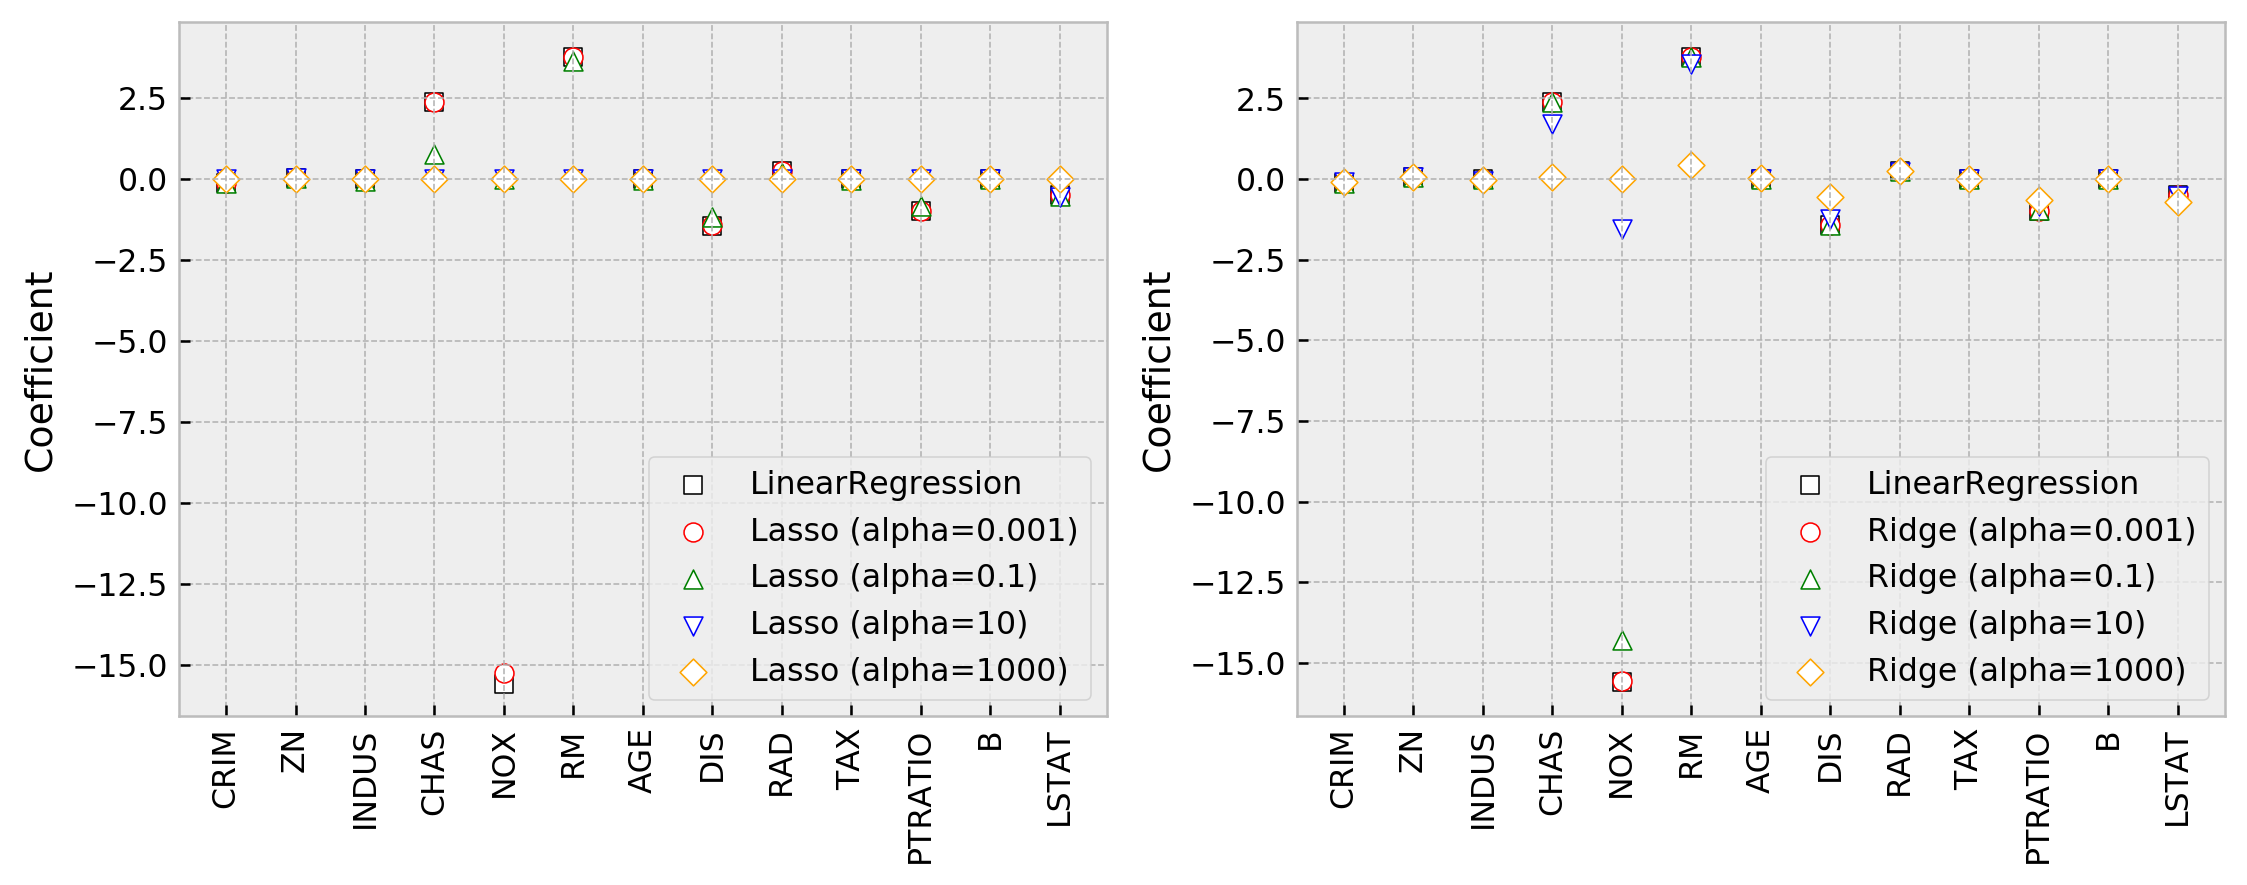

In [5]:
boston = load_boston()
fig, axes = plt.subplots(1, 2, dpi=227, figsize=(10, 4))

est = LinearRegression()
est.fit(X_train, y_train)
axes[0].scatter(np.arange(len(est.coef_)), est.coef_, marker='s', c='w', edgecolor='k', label='LinearRegression')
axes[0].set_xticks(np.arange(boston.data.shape[1]))
axes[0].set_xticklabels(boston.feature_names, {'rotation': 90})
#axes[0].hlines(0, 0, boston.data.shape[1]-1, linestyles=':')
axes[0].set_ylabel('Coefficient')

est = Lasso(alpha=0.001)
est.fit(X_train, y_train)
axes[0].scatter(np.arange(len(est.coef_)), est.coef_, marker='o', c='w', edgecolor='r', label='Lasso (alpha=0.001)')

est = Lasso(alpha=0.1)
est.fit(X_train, y_train)
axes[0].scatter(np.arange(len(est.coef_)), est.coef_, marker='^', c='w', edgecolor='g', label='Lasso (alpha=0.1)')

est = Lasso(alpha=10)
est.fit(X_train, y_train)
axes[0].scatter(np.arange(len(est.coef_)), est.coef_, marker='v', c='w', edgecolor='b', label='Lasso (alpha=10)')

est = Lasso(alpha=1000)
est.fit(X_train, y_train)
axes[0].scatter(np.arange(len(est.coef_)), est.coef_, marker='D', c='w', edgecolor='orange', label='Lasso (alpha=1000)')
axes[0].legend()

est = LinearRegression()
est.fit(X_train, y_train)
axes[1].scatter(np.arange(len(est.coef_)), est.coef_, marker='s', c='w', edgecolor='k', label='LinearRegression')
axes[1].set_xticks(np.arange(boston.data.shape[1]))
axes[1].set_xticklabels(boston.feature_names, {'rotation': 90})
#axes[1].hlines(0, 0, boston.data.shape[1]-1, linestyles=':')
axes[1].set_ylabel('Coefficient')

est = Ridge(alpha=0.001)
est.fit(X_train, y_train)
axes[1].scatter(np.arange(len(est.coef_)), est.coef_, marker='o', c='w', edgecolor='r', label='Ridge (alpha=0.001)')

est = Ridge(alpha=0.1)
est.fit(X_train, y_train)
axes[1].scatter(np.arange(len(est.coef_)), est.coef_, marker='^', c='w', edgecolor='g', label='Ridge (alpha=0.1)')

est = Ridge(alpha=10)
est.fit(X_train, y_train)
axes[1].scatter(np.arange(len(est.coef_)), est.coef_, marker='v', c='w', edgecolor='b', label='Ridge (alpha=10)')

est = Ridge(alpha=1000)
est.fit(X_train, y_train)
axes[1].scatter(np.arange(len(est.coef_)), est.coef_, marker='D', c='w', edgecolor='orange', label='Ridge (alpha=1000)')
axes[1].legend()

plt.tight_layout()